In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import datetime

In [65]:
%run -i "D:/crs/src/NOPP_Utilities/storm_coords.py"

In [2]:
# Target date
start_date = np.datetime64('2019-09-03 00:00:00')
end_date = np.datetime64('2019-09-07 00:00:00')
tol = np.timedelta64(14, 'm') # not used

In [104]:
# NDBC buoy data
buoy = ['41159','41025']
lonb = [-76.946, -75.363]
latb = [34.213, 35.025]
bdepth = [30., 48.8]

In [108]:
urlb1 = 'https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/'+buoy[0]+'/'+buoy[0]+'h2019.nc'
print(urlb1)
dsb1 = xr.open_dataset(urlb1)

wtime = dsb1['time'].values
idxws = int( np.where(wtime == start_date)[0][0] )
idxwe = int( np.where(wtime == end_date)[0][0] )
print(idxws, wtime[idxws])
print(idxwe, wtime[idxwe])
wtime1 = wtime[idxws:idxwe]
# Calculate the time difference between consecutive entries
print('If more than one value appears below, time delta [s] is not constant.')
time_diffs = np.diff(wtime1)/1.e9
print(np.unique(time_diffs))

Hso1 = np.squeeze( dsb1.wave_height[idxws:idxwe].values )
Tpo1 = np.squeeze( dsb1.dominant_wpd[idxws:idxwe].values.astype('timedelta64[s]').astype(float) )
Tmo1 = np.squeeze( dsb1.average_wpd[idxws:idxwe].values.astype('timedelta64[s]').astype(float) )
Dmo1 = np.squeeze( dsb1.mean_wave_dir[idxws:idxwe].values )

https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/41159/41159h2019.nc
11534 2019-09-03T00:00:00.000000000
11725 2019-09-07T00:00:00.000000000
If more than one value appears below, time delta [s] is not constant.
[1800 3600]


In [115]:
dsb1

<xarray.Dataset> Size: 1MB
Dimensions:                  (time: 17278, latitude: 1, longitude: 1)
Coordinates:
  * time                     (time) datetime64[ns] 138kB 2019-01-01 ... 2019-...
  * latitude                 (latitude) float32 4B 34.21
  * longitude                (longitude) float32 4B -76.95
Data variables: (12/13)
    wind_dir                 (time, latitude, longitude) float64 138kB ...
    wind_spd                 (time, latitude, longitude) float32 69kB ...
    gust                     (time, latitude, longitude) float32 69kB ...
    wave_height              (time, latitude, longitude) float32 69kB ...
    dominant_wpd             (time, latitude, longitude) timedelta64[ns] 138kB ...
    average_wpd              (time, latitude, longitude) timedelta64[ns] 138kB ...
    ...                       ...
    air_pressure             (time, latitude, longitude) float32 69kB ...
    air_temperature          (time, latitude, longitude) float32 69kB ...
    sea_surface_temperature  (time, latitude, longitude) float32 69kB ...
    dewpt_temperature        (time, latitude, longitude) float32 69kB ...
    visibility               (time, latitude, longitude) float32 69kB ...
    water_level              (time, latitude, longitude) float32 69kB ...
Attributes:
    institution:                     NOAA National Data Buoy Center and Parti...
    url:                             http://dods.ndbc.noaa.gov
    quality:                         Automated QC checks with manual editing ...
    conventions:                     COARDS
    station:                         41159
    comment:                         Onslow Bay Outer, NC (217)
    location:                        34.213 N 76.949 W 
    DODS_EXTRA.Unlimited_Dimension:  time

In [102]:
urlb2 = 'https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/'+buoy[1]+'/'+buoy[1]+'h2019.nc'
print(urlb2)
dsb2 = xr.open_dataset(urlb2)

wtime = dsb2['time'].values
idxws2 = int( np.where(wtime == start_date)[0][0] )
idxwe2 = int( np.where(wtime == end_date)[0][0] )
print(idxws2, wtime[idxws2])
print(idxwe2, wtime[idxwe2])
wtime2 = wtime[idxws2:idxwe2]
# Calculate the time difference between consecutive entries
print('If more than one value appears below, time delta [s] is not constant.')
time_diffs = np.diff(wtime2)/1.e9
print(np.unique(time_diffs))

Hso2 = np.squeeze( dsb2.wave_height[idxws2:idxwe2].values )
Tpo2 = np.squeeze( dsb2.dominant_wpd[idxws2:idxwe2].values.astype('timedelta64[s]').astype(float) )
Tmo2 = np.squeeze( dsb2.average_wpd[idxws2:idxwe2].values.astype('timedelta64[s]').astype(float) )
Dmo2 = np.squeeze( dsb2.mean_wave_dir[idxws2:idxwe2].values )

non_nan_indexes = np.where(~np.isnan(Hso2))[0]
# print(Hso2[non_nan_indexes])
wtime2 = wtime2[non_nan_indexes]
Hso2 = Hso2[non_nan_indexes]
Tpo2 = Tpo2[non_nan_indexes]
Tmo2 = Tmo2[non_nan_indexes]
Dmo2 = Dmo2[non_nan_indexes]

https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/41025/41025h2019.nc
13209 2019-09-03T00:00:00.000000000
13785 2019-09-07T00:00:00.000000000
If more than one value appears below, time delta [s] is not constant.
[600]


(5.0, 15.0)

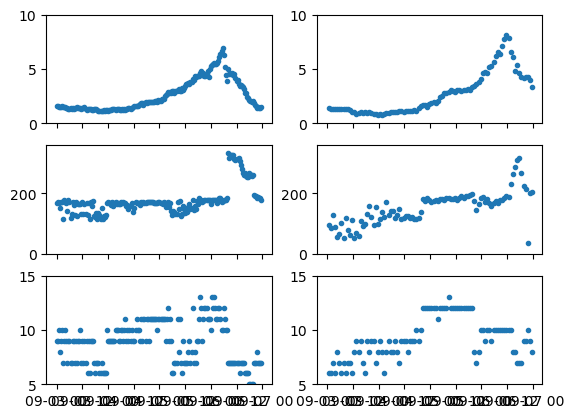

In [103]:
fig, axs = plt.subplots( 3, 2, sharex=True, sharey=False )
axs[0,0].plot(wtime1, Hso1, '.')
axs[0,0].set_ylim((0,10))
axs[0,1].plot(wtime2, Hso2, '.')
axs[0,1].set_ylim((0,10))

axs[1,0].plot(wtime1, Dmo1, '.')
axs[1,0].set_ylim((0,360))
axs[1,1].plot(wtime2, Dmo2, '.')
axs[1,1].set_ylim((0,360))

axs[2,0].plot(wtime1, Tpo1, '.')
axs[2,0].set_ylim((5,15))
axs[2,1].plot(wtime2, Tpo2, '.')
axs[2,1].set_ylim((5,15))



In [74]:
# Pamlico Sound model results
url='http://geoport.whoi.edu/thredds/dodsC/vortexfs1/usgs/Projects/dorian/dorian_coupled11/PAM/dorian_his.ncml'

dsm = xr.open_dataset(url)
latp = dsm.lat_rho.values
lonp = dsm.lon_rho.values
ot = dsm.ocean_time.values

In [75]:
dsm

<xarray.Dataset> Size: 52GB
Dimensions:          (tracer: 2, s_rho: 16, s_w: 17, eta_rho: 857,
                      xi_rho: 1067, eta_u: 857, xi_u: 1066, eta_v: 856,
                      xi_v: 1067, eta_psi: 856, xi_psi: 1066, ocean_time: 193)
Coordinates:
  * s_rho            (s_rho) float64 128B -0.9688 -0.9062 ... -0.09375 -0.03125
  * s_w              (s_w) float64 136B -1.0 -0.9375 -0.875 ... -0.0625 0.0
    lon_rho          (eta_rho, xi_rho) float64 7MB -76.89 -76.89 ... -75.84
    lat_rho          (eta_rho, xi_rho) float64 7MB 34.31 34.31 ... 36.84 36.84
    lon_u            (eta_u, xi_u) float64 7MB ...
    lat_u            (eta_u, xi_u) float64 7MB ...
    lon_v            (eta_v, xi_v) float64 7MB ...
    lat_v            (eta_v, xi_v) float64 7MB ...
    lon_psi          (eta_psi, xi_psi) float64 7MB ...
    lat_psi          (eta_psi, xi_psi) float64 7MB ...
  * ocean_time       (ocean_time) datetime64[ns] 2kB 2019-08-30 ... 2019-09-07
Dimensions without coordinates: tracer, eta_rho, xi_rho, eta_u, xi_u, eta_v,
                                xi_v, eta_psi, xi_psi
Data variables: (12/91)
    ntimes           int32 4B ...
    ndtfast          int32 4B ...
    dt               float64 8B ...
    dtfast           float64 8B ...
    dstart           datetime64[ns] 8B ...
    nHIS             int32 4B ...
    ...               ...
    temp             (ocean_time, s_rho, eta_rho, xi_rho) float32 11GB ...
    salt             (ocean_time, s_rho, eta_rho, xi_rho) float32 11GB ...
    Pair             (ocean_time, eta_rho, xi_rho) float32 706MB ...
    Hwave            (ocean_time, eta_rho, xi_rho) float32 706MB ...
    Dwave            (ocean_time, eta_rho, xi_rho) float32 706MB ...
    Pwave_top        (ocean_time, eta_rho, xi_rho) float32 706MB ...
Attributes: (12/32)
    file:                      ./Output/Dorian_Pam_his_00007.nc
    format:                    netCDF-3 64bit offset file
    Conventions:               CF-1.4, SGRID-0.3
    type:                      ROMS/TOMS history file
    title:                     Hurricane Dorian
    var_info:                  ROMS/External/varinfo.dat
    ...                        ...
    tiling:                    012x007
    history:                   ROMS/TOMS, Version 3.9, Sunday - January 8, 20...
    ana_file:                  ROMS/Functionals/ana_btflux.h, ROMS/Functional...
    CPP_options:               DORIAN, ANA_BSFLUX, ANA_BTFLUX, ANA_FSOBC, ANA...
    EXTRA_DIMENSION.N:         16
    EXTRA_DIMENSION.boundary:  4

In [77]:
mask_rho = dsm.mask_rho.values
np.shape(mask_rho)

(857, 1067)

In [122]:
# Calculate the difference between the grid points and the buoy location
# TODO - should probably use the wetdry mask
model_shape = np.shape( lonp )
print(model_shape)
db1 = haversine( (lonp*mask_rho).flatten(), (latp*mask_rho).flatten() , lonb[0], latb[0] )
db2 = haversine( (lonp*mask_rho).flatten(), (latp*mask_rho).flatten() , lonb[1], latb[1] )

db2d2 = haversine( (lonp*mask_rho), (latp*mask_rho) , lonb[1], latb[1] )
print( np.argwhere( db2d2 == np.min(db2d2) ) )

# Reshape db1 to match the 2D shape of the original array (lonp after masking)
db2_reshaped = db2.reshape(model_shape)

# Find the indices of the minimum distance in the reshaped db1 array
min_index_2d = np.unravel_index(np.argmin(db2_reshaped), model_shape)
print(min_index_2d)

(857, 1067)
[[ 18 916]]
(np.int64(18), np.int64(916))


In [116]:
# Find the index of the minimum distance (closest grid point)
min_index1 = np.argmin(db1)
print(min_index1)
min_index2 = np.argmin(db2)
print(min_index2)

# Extract the closest latitude and longitude indices
closest_lat1 = latp.flatten()[min_index1]
closest_lon1 = lonp.flatten()[min_index1]
closest_lat2 = latp.flatten()[min_index2]
closest_lon2 = lonp.flatten()[min_index2]

print(closest_lat1, latb[0])
print(closest_lon1, lonb[0])
print( db1[int(min_index1)] )

print(closest_lat2, latb[1])
print(closest_lon2, lonb[1])
print( db2[int(min_index2)] )

0
20122
34.307227714210285 34.213
-76.8891854112702 -76.946
11.706557117427817
35.025878596460295 35.025
-75.36299076067122 -75.363
0.09769909135999073


In [ ]:
# Try to do this grabbing both indices


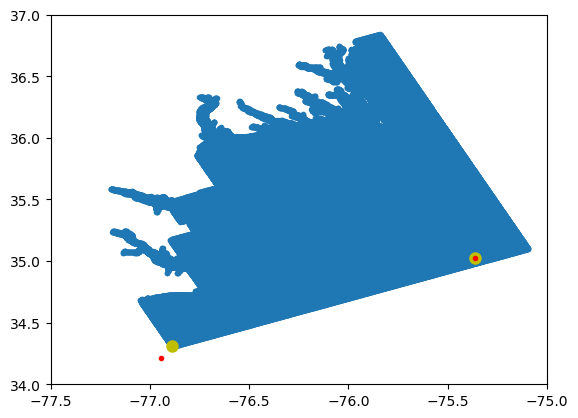

In [97]:
# Plot the grids, buoy locations, and corresponding grid point
_ = plt.plot((lonp*mask_rho).flatten(), (latp*mask_rho).flatten(), '.')
plt.xlim(-77.5, -75)
plt.ylim(34, 37)
plt.plot(lonb[0], latb[0], '.r', ms=6 )
plt.plot(closest_lon1, closest_lat1, 'oy', ms = 8 )
plt.plot(closest_lon2, closest_lat2, 'oy', ms = 8 )
plt.plot(lonb[1], latb[1], '.r', ms = 6 )


In [107]:
# Get the water depth
h1  = dsm.h.values.flatten()[min_index1]
h2  = dsm.h.values.flatten()[min_index2]
print(buoy[0],': buoy depth ',bdepth[0],', model depth: ',h1,' distance apart:',db1[int(min_index1)]) 
print(buoy[1],': buoy depth ',bdepth[1],', model depth: ',h2,' distance apart:',db2[int(min_index2)]) 

41159 : buoy depth  30.0 , model depth:  27.91462105383439  distance apart: 11.706557117427817
41025 : buoy depth  48.8 , model depth:  86.2449222292711  distance apart: 0.09769909135999073


In [111]:
# Step 1: Find common times
common_times, idx1, idx2 = np.intersect1d( dsm.ocean_time.values, dsb1.time.values, return_indices=True)

# Step 2: Extract data from dataset1 and dataset2 based on the common times
# Hsm = dsm.Hwave.values.flatten[idx1]
#  = dataset2_data[idx2]

In [114]:
np.shape( dsm.Hwave[idx1,:,:] )

(193, 857, 1067)